In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

Image sizes used in the Efficientnet model:

- efficientnet-b0-224 -cv train with 192
- efficientnet-b1-240 -cv train with 256
- efficientnet-b2-260 -cv train with 256
- efficientnet-b3-300 -cv train with 384
- efficientnet-b4-380 -cv train with 384
- efficientnet-b5-456 -cv train with 512
- efficientnet-b6-528 -cv train with 512
- efficientnet-b7-600 -cv train with 768

In [2]:
# IMPORT FINAL CROSSVAL PREDICTIONS WITHOUT META
PATH = '../../final crossvals/cv_test_preds/'
b0_cv_file = pd.read_csv(f'{PATH}EB0-192-5FCV-submission.csv').rename({'target':'B0'},axis=1)
b1_cv_file = pd.read_csv(f'{PATH}EB1-256-5FCV-submission.csv').rename({'target':'B1'},axis=1)
b2_cv_file = pd.read_csv(f'{PATH}EB2-256-5FCV-BS16-submission.csv').rename({'target':'B2'},axis=1)
b3_cv_file = pd.read_csv(f'{PATH}EB3-384-5FCV-submission.csv').rename({'target':'B3'},axis=1)
b4_cv_file = pd.read_csv(f'{PATH}EB4-384-5FCV-submission.csv').rename({'target':'B4'},axis=1)

In [3]:
# IMPORT FINAL CROSSVAL PREDICTIONS WITH META
PATH = '../../final crossvals/cv_test_preds/'
b0_cv_meta_file = pd.read_csv(f'{PATH}EB0-192-5FCV-META-submission.csv').rename({'target':'B0'},axis=1)
b1_cv_meta_file = pd.read_csv(f'{PATH}EB1-256-5FCV-META-submission.csv').rename({'target':'B1'},axis=1)
b2_cv_meta_file = pd.read_csv(f'{PATH}EB2-256-5FCV-META-BS16-submission.csv').rename({'target':'B2'},axis=1)
b3_cv_meta_file = pd.read_csv(f'{PATH}EB3-384-5FCV-META-submission.csv').rename({'target':'B3'},axis=1)
b4_cv_meta_file = pd.read_csv(f'{PATH}EB4-384-5FCV-META-submission.csv').rename({'target':'B4'},axis=1)

In [4]:
# IMPORT FINAL FULL DATA PREDICTIONS WITHOUT META
PATH = '../../final models/test_preds/'
b0_final_file = pd.read_csv(f'{PATH}EB0-192-FINAL-submission.csv').rename({'target':'B0'},axis=1)
b1_final_file = pd.read_csv(f'{PATH}EB1-256-FINAL-submission.csv').rename({'target':'B1'},axis=1)
b2_final_file = pd.read_csv(f'{PATH}EB2-256-FINAL-submission.csv').rename({'target':'B2'},axis=1)
b3_final_file = pd.read_csv(f'{PATH}EB3-384-FINAL-submission.csv').rename({'target':'B3'},axis=1)
b4_final_file = pd.read_csv(f'{PATH}EB4-384-FINAL-submission.csv').rename({'target':'B4'},axis=1)
b5_final_file = pd.read_csv(f'{PATH}EB5-512-FINAL-submission.csv').rename({'target':'B5'},axis=1)
b6_final_file = pd.read_csv(f'{PATH}EB6-512-FINAL-submission.csv').rename({'target':'B6'},axis=1)
b7_final_file = pd.read_csv(f'{PATH}EB7-768-FINAL-submission.csv').rename({'target':'B7'},axis=1)
b7_final_file_cont = pd.read_csv(f'{PATH}EB7-768-FINAL-CONT-submission.csv').rename({'target':'B7C'},axis=1)

In [5]:
# IMPORT FINAL FULL DATA PREDICTIONS WITH META
PATH = '../../final models/test_preds/'
b0_final_meta_file = pd.read_csv(f'{PATH}EB0-192-FINAL-META-submission.csv').rename({'target':'B0'},axis=1)
b1_final_meta_file = pd.read_csv(f'{PATH}EB1-256-FINAL-META-submission.csv').rename({'target':'B1'},axis=1)
b2_final_meta_file = pd.read_csv(f'{PATH}EB2-256-FINAL-META-submission.csv').rename({'target':'B2'},axis=1)
b3_final_meta_file = pd.read_csv(f'{PATH}EB3-384-FINAL-META-submission.csv').rename({'target':'B3'},axis=1)
b4_final_meta_file = pd.read_csv(f'{PATH}EB4-384-FINAL-META-submission.csv').rename({'target':'B4'},axis=1)
b5_final_meta_file = pd.read_csv(f'{PATH}EB5-512-FINAL-META-submission.csv').rename({'target':'B5'},axis=1)
b6_final_meta_file = pd.read_csv(f'{PATH}EB6-512-FINAL-META-submission.csv').rename({'target':'B6'},axis=1)
b7_final_meta_file = pd.read_csv(f'{PATH}EB7-768-FINAL-META-submission.csv').rename({'target':'B7'},axis=1)
b7_final_meta_file_cont = pd.read_csv(f'{PATH}EB7-768-FINAL-META-CONT-submission.csv').rename({'target':'B7C'},axis=1)

In [6]:
# IMPORT META PREDICTIONS
meta_base = pd.read_csv('DATA_BASELINE_EXT.csv').rename({'target':'BASE'},axis=1)
meta_xgb = pd.read_csv('DATA-XGB.csv').rename({'target':'XGB'},axis=1)

#### ENSEMBLE STRATEGY - 1-3-5-1 ratio
This notebook attempts to use best models with a 1-3-5-1 ratio across models.

- EB1 - EB3 are predictions from the cross validation process using best weights with embedded meta.
- Rest use the full training set with parameters discovered through experimentation.
- When meta is embedded in the cross validations, this is using the simple statistical prediction model.
##### Ratio
- 10% EB0 to EB2 (5% each)
- 30% EB3 to EB5 (10% each)
- 50% EB6 to EB7 (25% each)
- 10% Metadata (10%)



In [7]:
# STRATEGY
b0 = b0_final_meta_file
b1 = b1_cv_meta_file
b2 = b2_cv_meta_file
b3 = b3_cv_meta_file
b4 = b4_final_meta_file
b5 = b5_final_meta_file
b6 = b6_final_meta_file
b7 = b7_final_meta_file
b7c = b7_final_meta_file_cont

In [8]:
# DATAFRAME WITH CHOSEN FILES
ensemble = b0.merge(b1,on='image_name',how='left')
ensemble = ensemble.merge(b2,on='image_name',how='left')
ensemble = ensemble.merge(b3,on='image_name',how='left')
ensemble = ensemble.merge(b4,on='image_name',how='left')
ensemble = ensemble.merge(b5,on='image_name',how='left')
ensemble = ensemble.merge(b6_final_file,on='image_name',how='left')
ensemble = ensemble.merge(b7,on='image_name',how='left')
ensemble = ensemble.merge(b7c,on='image_name',how='left')
ensemble = ensemble.merge(meta_xgb,on='image_name',how='left')
ensemble = ensemble.merge(meta_base,on='image_name',how='left')

In [9]:
ensemble.head()

,image_name,B0,B1,B2,B3,B4,B5,B6,B7,B7C,XGB,BASE
0,ISIC_0052060,0.049804,0.038699,0.032215,0.030888,0.037837,0.034454,0.032139,0.070582,0.049241,0.091491,0.212977
1,ISIC_0052349,0.009047,0.019712,0.014881,0.010294,0.027783,0.014947,0.008808,0.028974,0.018491,0.023428,0.022024
2,ISIC_0058510,0.013168,0.017384,0.017205,0.011822,0.024370,0.016137,0.018836,0.023015,0.020807,0.058862,0.051824
3,ISIC_0073313,0.018475,0.022721,0.014485,0.010277,0.020608,0.018002,0.026485,0.025190,0.022585,0.064804,0.041612
4,ISIC_0073502,0.051991,0.019565,0.049719,0.018112,0.030327,0.031099,0.034078,0.044789,0.032429,0.066132,0.057935


In [10]:
# ASSIGN GROUPINGS AND WEIGHTINGS
WGT_B0 = 5
WGT_B1 = 5
WGT_B2 = 5
WGT_B3 = 7.5
WGT_B4 = 7.5
WGT_B5 = 25
WGT_B6 = 10
WGT_B7 = 0
WGT_B7C = 25
WGT_DATA = 10
TOT=100

print("Check: ",((WGT_B0+WGT_B1+WGT_B2+WGT_B3+WGT_B4+WGT_B5+WGT_B6+WGT_B7+WGT_B7C+WGT_DATA)/TOT))

Check:  1.0


In [11]:
ensemble['target']=(WGT_B0/100*ensemble.B0
                    +WGT_B1/100*ensemble.B1
                    +WGT_B2/100*ensemble.B2
                    +WGT_B3/100*ensemble.B3
                    +WGT_B4/100*ensemble.B4
                    +WGT_B5/100*ensemble.B5
                    +WGT_B6/100*ensemble.B6
                    +WGT_B7/100*ensemble.B7
                    +WGT_B7C/100*ensemble.B7C
                    +WGT_DATA/100*ensemble.XGB #XGB or BASE
                   )
    
ensemble.head(5)

,image_name,B0,B1,B2,B3,B4,B5,B6,B7,B7C,XGB,BASE,target
0,ISIC_0052060,0.049804,0.038699,0.032215,0.030888,0.037837,0.034454,0.032139,0.070582,0.049241,0.091491,0.212977,0.044477
1,ISIC_0052349,0.009047,0.019712,0.014881,0.010294,0.027783,0.014947,0.008808,0.028974,0.018491,0.023428,0.022024,0.016621
2,ISIC_0058510,0.013168,0.017384,0.017205,0.011822,0.024370,0.016137,0.018836,0.023015,0.020807,0.058862,0.051824,0.022108
3,ISIC_0073313,0.018475,0.022721,0.014485,0.010277,0.020608,0.018002,0.026485,0.025190,0.022585,0.064804,0.041612,0.024376
4,ISIC_0073502,0.051991,0.019565,0.049719,0.018112,0.030327,0.031099,0.034078,0.044789,0.032429,0.066132,0.057935,0.035600


In [12]:
ensemble.sort_values(by=['target'], ascending=False, inplace=True)
ensemble.head(40)

,image_name,B0,B1,B2,B3,B4,B5,B6,B7,B7C,XGB,BASE,target
10290,ISIC_9353360,0.846404,0.957730,0.897650,0.532955,0.911009,0.942548,0.923169,0.912756,0.899500,0.305503,0.316196,0.826765
3045,ISIC_2839742,0.871751,0.946440,0.883014,0.527103,0.892902,0.918809,0.958434,0.887189,0.886946,0.226195,0.241421,0.811462
4096,ISIC_3809896,0.872932,0.960394,0.867540,0.524770,0.905427,0.929157,0.875803,0.925237,0.891695,0.254693,0.357727,0.810571
2750,ISIC_2568903,0.739014,0.914478,0.732887,0.515174,0.833591,0.946946,0.830338,0.926343,0.905554,0.310344,0.420737,0.797670
6058,ISIC_5541445,0.764612,0.912292,0.685154,0.515762,0.704832,0.947309,0.860598,0.923206,0.908690,0.310344,0.420737,0.790741
6020,ISIC_5505677,0.847529,0.929383,0.831964,0.524851,0.884537,0.920314,0.943974,0.874674,0.807983,0.259780,0.437614,0.788598
4209,ISIC_3895426,0.839828,0.914180,0.859303,0.511253,0.893603,0.926546,0.948327,0.880488,0.867583,0.087570,0.094121,0.788152
5704,ISIC_5224960,0.825890,0.907348,0.815383,0.499472,0.849760,0.932778,0.904219,0.883668,0.873923,0.162738,0.170580,0.786994
6730,ISIC_6096565,0.867388,0.824455,0.848485,0.528660,0.879808,0.864856,0.921768,0.888925,0.855291,0.259780,0.437614,0.780843
9798,ISIC_8917854,0.854717,0.925734,0.872662,0.507529,0.900461,0.917299,0.941362,0.822503,0.792773,0.206515,0.274393,0.780561


In [13]:
ensemble.sort_values(by=['image_name'], ascending=True, inplace=True)
ensemble_sub = ensemble[['image_name','target']]
ensemble_sub.head()

,image_name,target
0,ISIC_0052060,0.044477
1,ISIC_0052349,0.016621
2,ISIC_0058510,0.022108
3,ISIC_0073313,0.024376
4,ISIC_0073502,0.035600


In [14]:
ensemble_sub.to_csv('ENSEMBLE_FINAL_1351v4.csv',index=False)

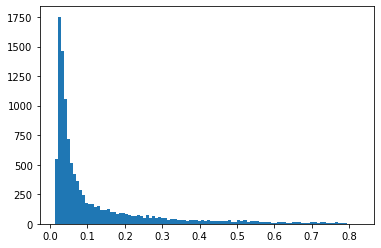

In [15]:
# PLOT DISTRIBUTION WITH META
plt.hist(ensemble_sub.target,bins=100)
plt.show()